## Call Centre Trends

***

## Project Description

It’s omnipresent: telecom marketing. Better price here. Better service there. Best for small businesses here. Best for young urbanites there. But what do customers really want? Our client, a big telecom company needs to know.

Create a dashboard in Power BI for Claire that reflects all relevant Key Performance Indicators (KPIs) and metrics in the dataset. Get creative! 

Possible KPIs include (to get you started, but not limited to):

    Overall customer satisfaction
    Overall calls answered/abandoned
    Calls by time
    Average speed of answer
    Agent’s performance quadrant -> average handle time (talk duration) vs calls answered

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

import scipy.stats

# import pandas_profiling
# from pandas_profiling import ProfileReport


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

#Webscraping
#import requests
#from bs4 import BeautifulSoup

# Use Folium library to plot values on a map.
#import folium

# Use Feature-Engine library
#import feature_engine
#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("Call-Center-Dataset.csv",parse_dates=['Date'])

In [3]:
df

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
0,ID0001,Diane,2021-01-01,9:12:58,Contract related,Y,Y,109.00,0:02:23,3.00
1,ID0002,Becky,2021-01-01,9:12:58,Technical Support,Y,N,70.00,0:04:02,3.00
2,ID0003,Stewart,2021-01-01,9:47:31,Contract related,Y,Y,10.00,0:02:11,3.00
3,ID0004,Greg,2021-01-01,9:47:31,Contract related,Y,Y,53.00,0:00:37,2.00
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.00,0:01:00,3.00
...,...,...,...,...,...,...,...,...,...,...
4995,ID4996,Jim,2021-03-31,16:37:55,Payment related,Y,Y,22.00,0:05:40,1.00
4996,ID4997,Diane,2021-03-31,16:45:07,Payment related,Y,Y,100.00,0:03:16,3.00
4997,ID4998,Diane,2021-03-31,16:53:46,Payment related,Y,Y,84.00,0:01:49,4.00
4998,ID4999,Jim,2021-03-31,17:02:24,Streaming,Y,Y,98.00,0:00:58,5.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Call Id                     5000 non-null   object        
 1   Agent                       5000 non-null   object        
 2   Date                        5000 non-null   datetime64[ns]
 3   Time                        5000 non-null   object        
 4   Topic                       5000 non-null   object        
 5   Answered (Y/N)              5000 non-null   object        
 6   Resolved                    5000 non-null   object        
 7   Speed of answer in seconds  4054 non-null   float64       
 8   AvgTalkDuration             4054 non-null   object        
 9   Satisfaction rating         4054 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 390.8+ KB


In [5]:
df.describe()

,Speed of answer in seconds,Satisfaction rating
count,4054.00,4054.00
mean,67.52,3.40
std,33.59,1.21
min,10.00,1.00
25%,39.00,3.00
50%,68.00,3.00
75%,97.00,4.00
max,125.00,5.00


In [6]:
df.columns

Index(['Call Id', 'Agent', 'Date', 'Time', 'Topic', 'Answered (Y/N)', 'Resolved', 'Speed of answer in seconds', 'AvgTalkDuration', 'Satisfaction rating'], dtype='object')

In [7]:
df["Time"] = pd.to_datetime(df["Time"], format="%H:%M:%S")

In [8]:
df.head()

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
0,ID0001,Diane,2021-01-01,1900-01-01 09:12:58,Contract related,Y,Y,109.00,0:02:23,3.00
1,ID0002,Becky,2021-01-01,1900-01-01 09:12:58,Technical Support,Y,N,70.00,0:04:02,3.00
2,ID0003,Stewart,2021-01-01,1900-01-01 09:47:31,Contract related,Y,Y,10.00,0:02:11,3.00
3,ID0004,Greg,2021-01-01,1900-01-01 09:47:31,Contract related,Y,Y,53.00,0:00:37,2.00
4,ID0005,Becky,2021-01-01,1900-01-01 10:00:29,Payment related,Y,Y,95.00,0:01:00,3.00


In [9]:
df["AvgTalkDuration"] = pd.to_datetime(df["AvgTalkDuration"], format="%H:%M:%S")

In [10]:
df.head()

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
0,ID0001,Diane,2021-01-01,1900-01-01 09:12:58,Contract related,Y,Y,109.00,1900-01-01 00:02:23,3.00
1,ID0002,Becky,2021-01-01,1900-01-01 09:12:58,Technical Support,Y,N,70.00,1900-01-01 00:04:02,3.00
2,ID0003,Stewart,2021-01-01,1900-01-01 09:47:31,Contract related,Y,Y,10.00,1900-01-01 00:02:11,3.00
3,ID0004,Greg,2021-01-01,1900-01-01 09:47:31,Contract related,Y,Y,53.00,1900-01-01 00:00:37,2.00
4,ID0005,Becky,2021-01-01,1900-01-01 10:00:29,Payment related,Y,Y,95.00,1900-01-01 00:01:00,3.00


In [11]:
df["AvgTalkSeconds"] = df["AvgTalkDuration"].dt.minute * 60 + df["AvgTalkDuration"].dt.second

In [12]:
df["AvgTalkSeconds"]

0      143.00
1      242.00
2      131.00
3       37.00
4       60.00
        ...  
4995   340.00
4996   196.00
4997   109.00
4998    58.00
4999      NaN
Name: AvgTalkSeconds, Length: 5000, dtype: float64

In [13]:
df.head()

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating,AvgTalkSeconds
0,ID0001,Diane,2021-01-01,1900-01-01 09:12:58,Contract related,Y,Y,109.00,1900-01-01 00:02:23,3.00,143.00
1,ID0002,Becky,2021-01-01,1900-01-01 09:12:58,Technical Support,Y,N,70.00,1900-01-01 00:04:02,3.00,242.00
2,ID0003,Stewart,2021-01-01,1900-01-01 09:47:31,Contract related,Y,Y,10.00,1900-01-01 00:02:11,3.00,131.00
3,ID0004,Greg,2021-01-01,1900-01-01 09:47:31,Contract related,Y,Y,53.00,1900-01-01 00:00:37,2.00,37.00
4,ID0005,Becky,2021-01-01,1900-01-01 10:00:29,Payment related,Y,Y,95.00,1900-01-01 00:01:00,3.00,60.00


In [14]:
df["Hour"] = df["Time"].dt.hour

In [15]:
df.head()

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating,AvgTalkSeconds,Hour
0,ID0001,Diane,2021-01-01,1900-01-01 09:12:58,Contract related,Y,Y,109.00,1900-01-01 00:02:23,3.00,143.00,9
1,ID0002,Becky,2021-01-01,1900-01-01 09:12:58,Technical Support,Y,N,70.00,1900-01-01 00:04:02,3.00,242.00,9
2,ID0003,Stewart,2021-01-01,1900-01-01 09:47:31,Contract related,Y,Y,10.00,1900-01-01 00:02:11,3.00,131.00,9
3,ID0004,Greg,2021-01-01,1900-01-01 09:47:31,Contract related,Y,Y,53.00,1900-01-01 00:00:37,2.00,37.00,9
4,ID0005,Becky,2021-01-01,1900-01-01 10:00:29,Payment related,Y,Y,95.00,1900-01-01 00:01:00,3.00,60.00,10


In [16]:
#df.to_csv("call.csv",index=False)

### Groupby Function

In [17]:
df.groupby(["Agent","Topic"]).mean()

Speed of answer in seconds  Satisfaction rating  AvgTalkSeconds  Hour
Agent   Topic                                                                                   
Becky   Admin Support                           62.98                 3.44          224.31 13.00
        Contract related                        68.47                 3.29          220.28 13.29
        Payment related                         68.71                 3.48          225.54 12.92
        Streaming                               64.10                 3.32          210.63 13.53
        Technical Support                       62.61                 3.31          220.45 13.03
Dan     Admin Support                           66.51                 3.51          230.53 13.14
        Contract related                        63.21                 3.26          228.54 13.10
        Payment related                         70.20                 3.42          240.93 13.15
        Streaming                               67.24                 3.45          227.38 12.92
        Technical Support                       68.81                 3.60          228.81 12.94
Diane   Admin Support                           61.46                 3.33          222.95 12.95
        Contract related                        65.52                 3.49          229.68 13.03
        Payment related                         70.98                 3.51          200.60 13.22
        Streaming                               67.08                 3.34          221.67 13.37
        Technical Support                       66.71                 3.38          219.67 12.85
Greg    Admin Support                           69.22                 3.35          218.46 12.95
        Contract related                        66.94                 3.44          246.89 13.26
        Payment related                         72.10                 3.31          189.08 12.92
        Streaming                               61.46                 3.44          247.86 12.91
        Technical Support                       73.34                 3.49          234.91 12.82
Jim     Admin Support                           69.26                 3.42          231.00 13.00
        Contract related                        67.98                 3.36          236.16 13.14
        Payment related                         65.28                 3.27          208.15 12.88
        Streaming                               67.12                 3.51          237.61 13.13
        Technical Support                       61.34                 3.41          224.23 13.18
Joe     Admin Support                           69.05                 3.49          231.91 12.57
        Contract related                        73.27                 3.42          208.98 13.26
        Payment related                         66.02                 3.26          219.76 13.23
        Streaming                               72.63                 3.22          229.93 12.72
        Technical Support                       74.05                 3.29          227.69 13.15
Martha  Admin Support                           70.82                 3.47          226.18 12.76
        Contract related                        68.08                 3.38          225.75 12.59
        Payment related                         65.44                 3.46          219.47 13.07
        Streaming                               72.75                 3.59          217.64 12.71
        Technical Support                       70.70                 3.45          230.16 13.12
Stewart Admin Support                           69.19                 3.43          240.65 13.45
        Contract related                        64.73                 3.40          224.49 12.87
        Payment related                         66.55                 3.45          221.38 13.11
        Streaming                               62.49                 3.35          231.54 13.13
        Technical Support                       67

In [18]:
df.groupby(["Agent","Answered (Y/N)"]).mean()

Speed of answer in seconds  Satisfaction rating  AvgTalkSeconds  Hour
Agent   Answered (Y/N)                                                                       
Becky   N                                      NaN                  NaN             NaN 13.32
        Y                                    65.33                 3.37          220.01 13.12
Dan     N                                      NaN                  NaN             NaN 12.74
        Y                                    67.28                 3.45          231.19 13.11
Diane   N                                      NaN                  NaN             NaN 13.06
        Y                                    66.27                 3.41          218.95 13.09
Greg    N                                      NaN                  NaN             NaN 12.77
        Y                                    68.44                 3.40          226.80 13.02
Jim     N                                      NaN                  NaN             NaN 13.08
        Y                                    66.34                 3.39          228.11 13.07
Joe     N                                      NaN                  NaN             NaN 12.80
        Y                                    70.99                 3.33          224.10 13.02
Martha  N                                      NaN                  NaN             NaN 12.90
        Y                                    69.49                 3.47          223.73 12.84
Stewart N                                      NaN                  NaN             NaN 13.06
        Y                                    66.18                 3.40          226.21 13.10

In [19]:
df.groupby(["Agent","Resolved"]).mean()

Speed of answer in seconds  Satisfaction rating  AvgTalkSeconds  Hour
Agent   Resolved                                                                       
Becky   N                              64.40                 3.47          232.35 13.09
        Y                              65.44                 3.36          218.54 13.18
Dan     N                              68.83                 3.56          252.63 12.90
        Y                              67.11                 3.44          228.82 13.09
Diane   N                              74.94                 3.51          190.45 13.20
        Y                              65.33                 3.39          222.04 13.04
Greg    N                              61.62                 3.45          228.60 12.96
        Y                              69.15                 3.40          226.62 12.97
Jim     N                              68.53                 3.33          232.12 13.13
        Y                              66.11                 3.40          227.69 13.05
Joe     N                              69.15                 3.27          203.58 12.87
        Y                              71.19                 3.34          226.36 13.02
Martha  N                              65.17                 3.25          212.34 12.99
        Y                              69.98                 3.50          225.03 12.80
Stewart N                              62.38                 3.58          226.21 13.26
        Y                              66.66                 3.38          226.21 13.04

In [20]:
df.groupby(["Date"]).mean()

,Speed of answer in seconds,Satisfaction rating,AvgTalkSeconds,Hour
Date,,,,
2021-01-01,65.30,3.50,207.20,12.97
2021-01-02,68.50,3.21,258.96,12.23
2021-01-03,78.60,3.47,212.06,11.90
2021-01-04,70.11,3.45,243.14,12.78
2021-01-05,70.20,3.49,223.39,13.50
...,...,...,...,...
2021-03-27,65.70,3.48,232.24,13.86
2021-03-28,55.23,2.90,186.77,13.68
2021-03-29,74.10,3.32,222.46,12.97


In [21]:
df.groupby(["Hour"]).mean()

,Speed of answer in seconds,Satisfaction rating,AvgTalkSeconds
Hour,,,
9,64.84,3.54,221.26
10,71.08,3.46,231.06
11,67.81,3.43,221.81
12,67.43,3.37,229.43
13,67.70,3.39,217.56
14,67.68,3.27,227.63
15,66.67,3.37,221.36
16,68.29,3.43,229.48
17,66.45,3.37,224.15


In [22]:
df.groupby(["Date","Hour"]).mean()

Speed of answer in seconds  Satisfaction rating  AvgTalkSeconds
Date       Hour                                                                 
2021-01-01 9                          60.50                 2.75          138.25
           10                         47.00                 3.00          106.00
           11                         59.00                 3.50          242.12
           12                         81.33                 3.56          252.33
           13                         63.57                 3.14          164.00
...                                     ...                  ...             ...
2021-03-31 13                         56.20                 3.60          302.40
           14                           NaN                  NaN             NaN
           15                           NaN                  NaN             NaN
           16                         68.67                 2.67          215.00
           17                         98.00                 5.00           58.00

[776 rows x 3 columns]

## Data Visualization

### Univariate Data Exploration

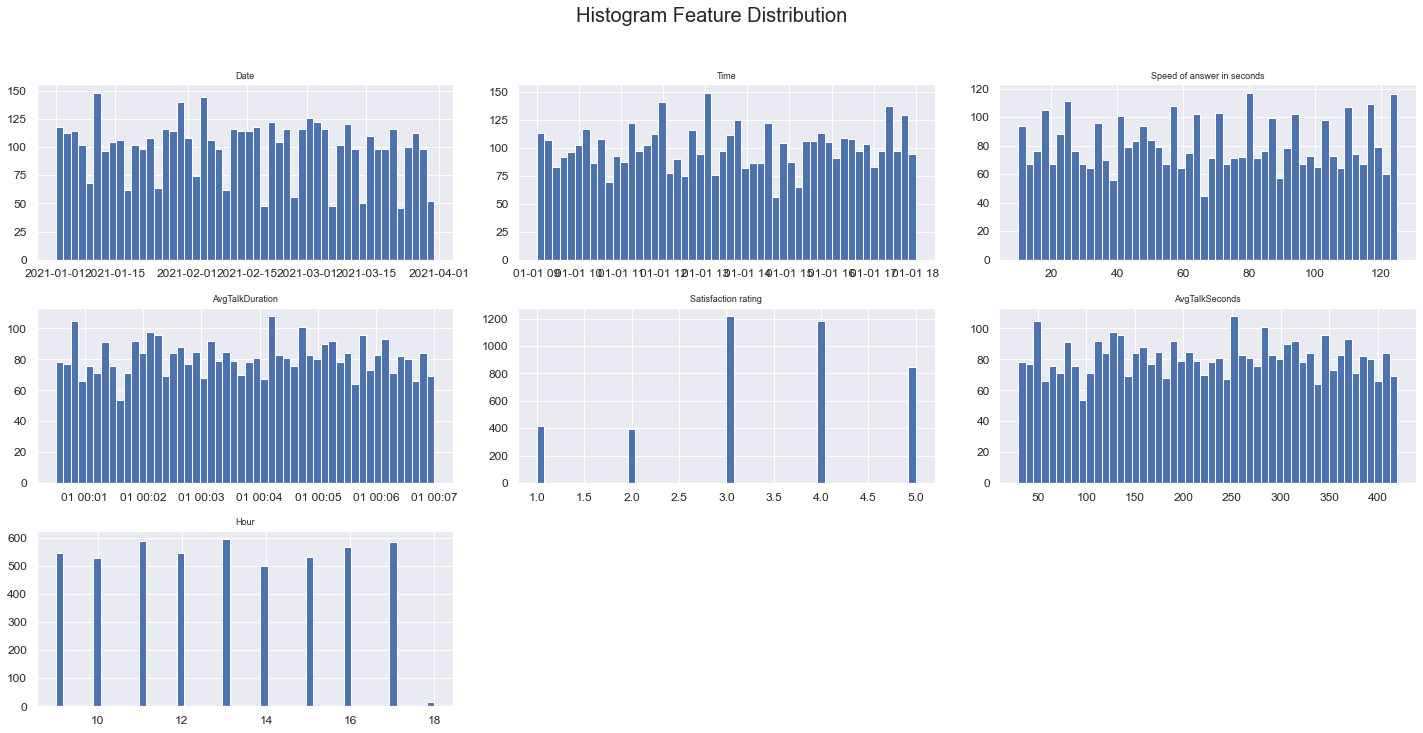

In [23]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

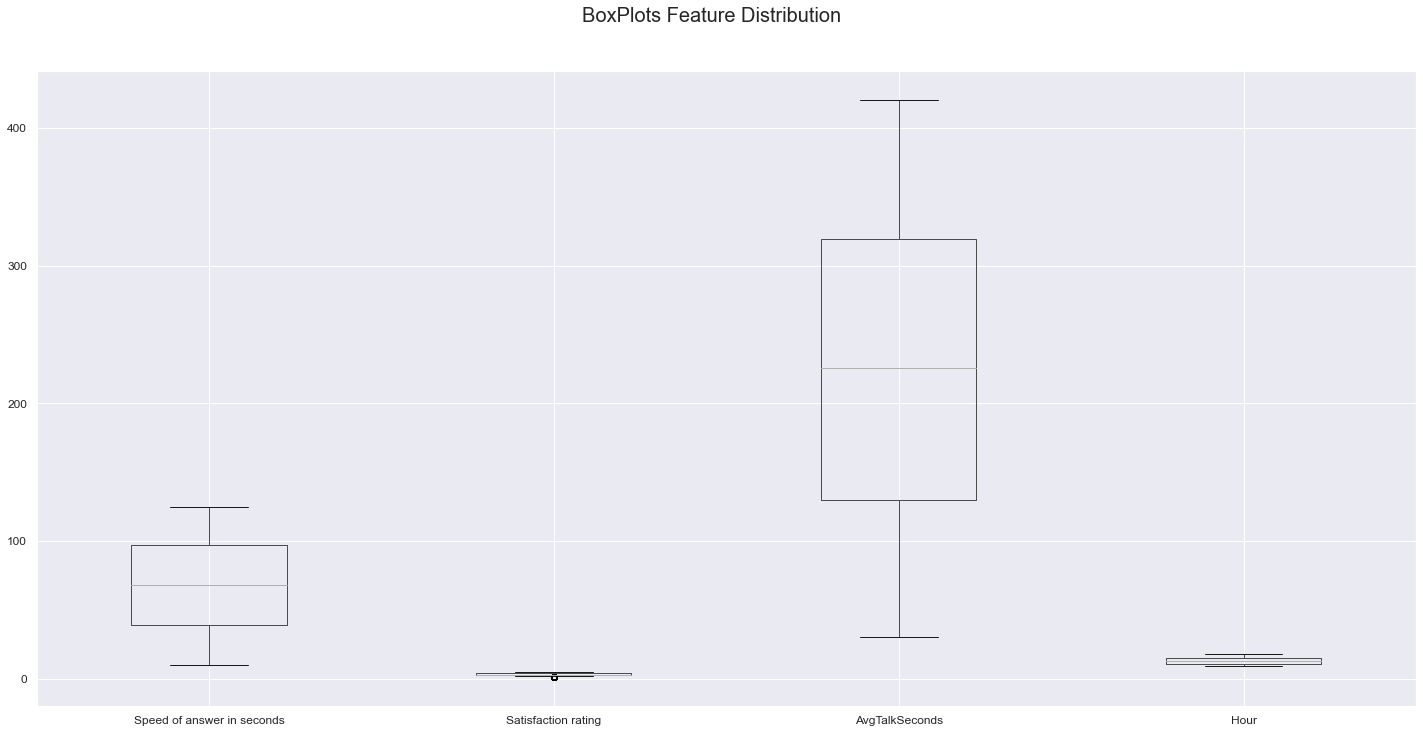

In [24]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

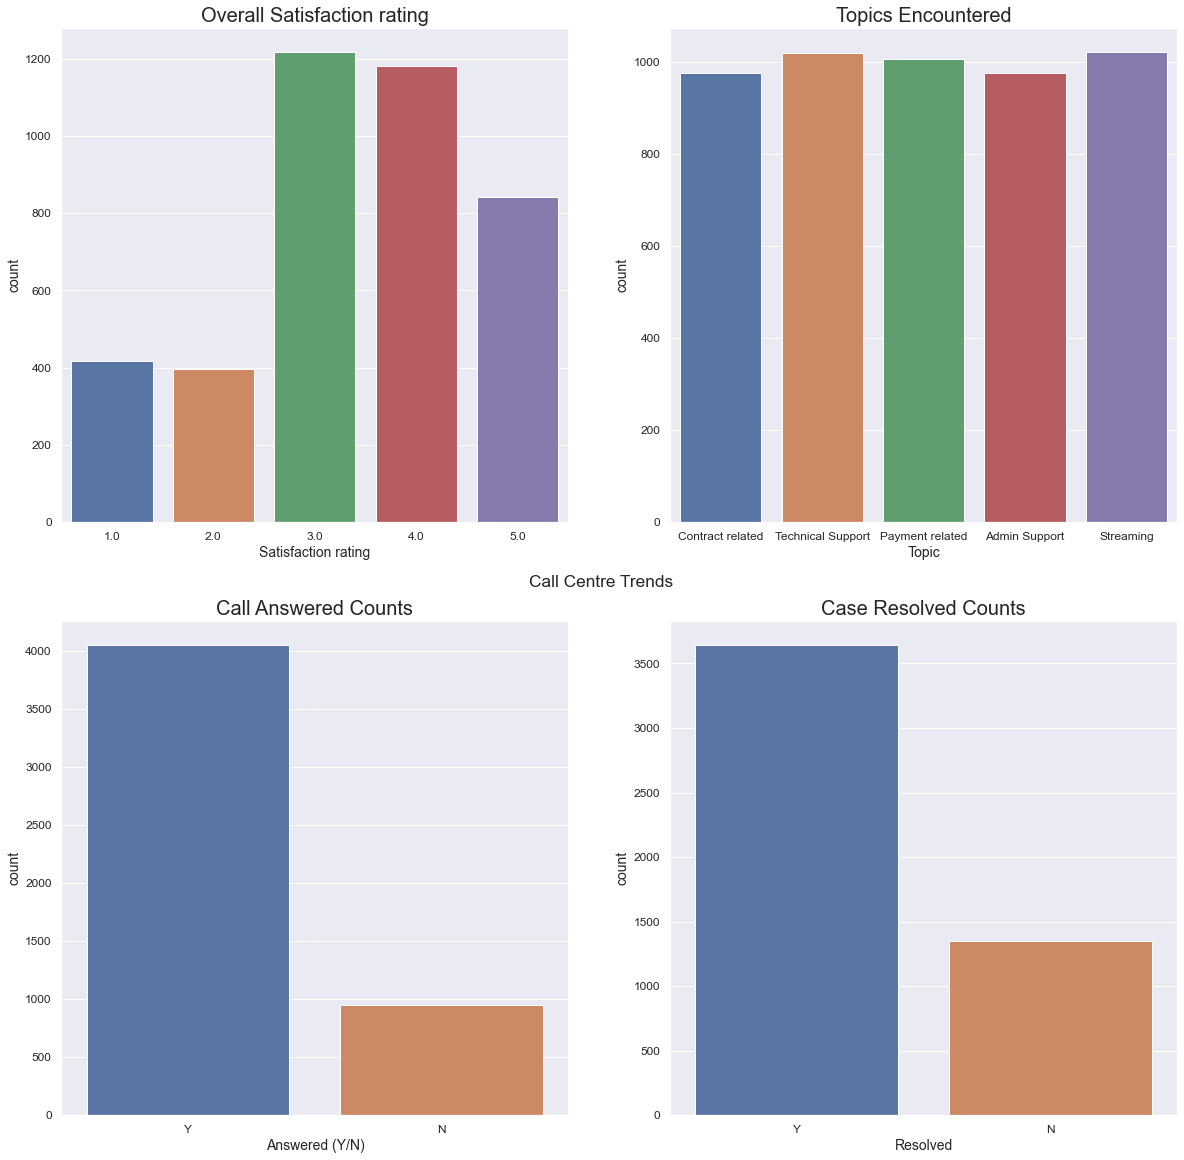

In [25]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=False, figsize=(20,20))
fig.suptitle('Call Centre Trends', y=0.5)

sns.countplot(x="Satisfaction rating", data=df, ax=ax1)
ax1.set_title('Overall Satisfaction rating', size=20)
#ax1.tick_params('x', labelrotation=45)


sns.countplot(x="Topic", data=df, ax=ax2)
ax2.set_title('Topics Encountered', size=20)
#ax2.tick_params('x', labelrotation=45)

sns.countplot(x="Answered (Y/N)", data=df, ax=ax3)
ax3.set_title('Call Answered Counts', size=20)
#ax3.tick_params('x', labelrotation=45)


sns.countplot(x="Resolved", data=df, ax=ax4)
ax4.set_title('Case Resolved Counts', size=20)
#ax4.tick_params('x', labelrotation=45)


plt.show()

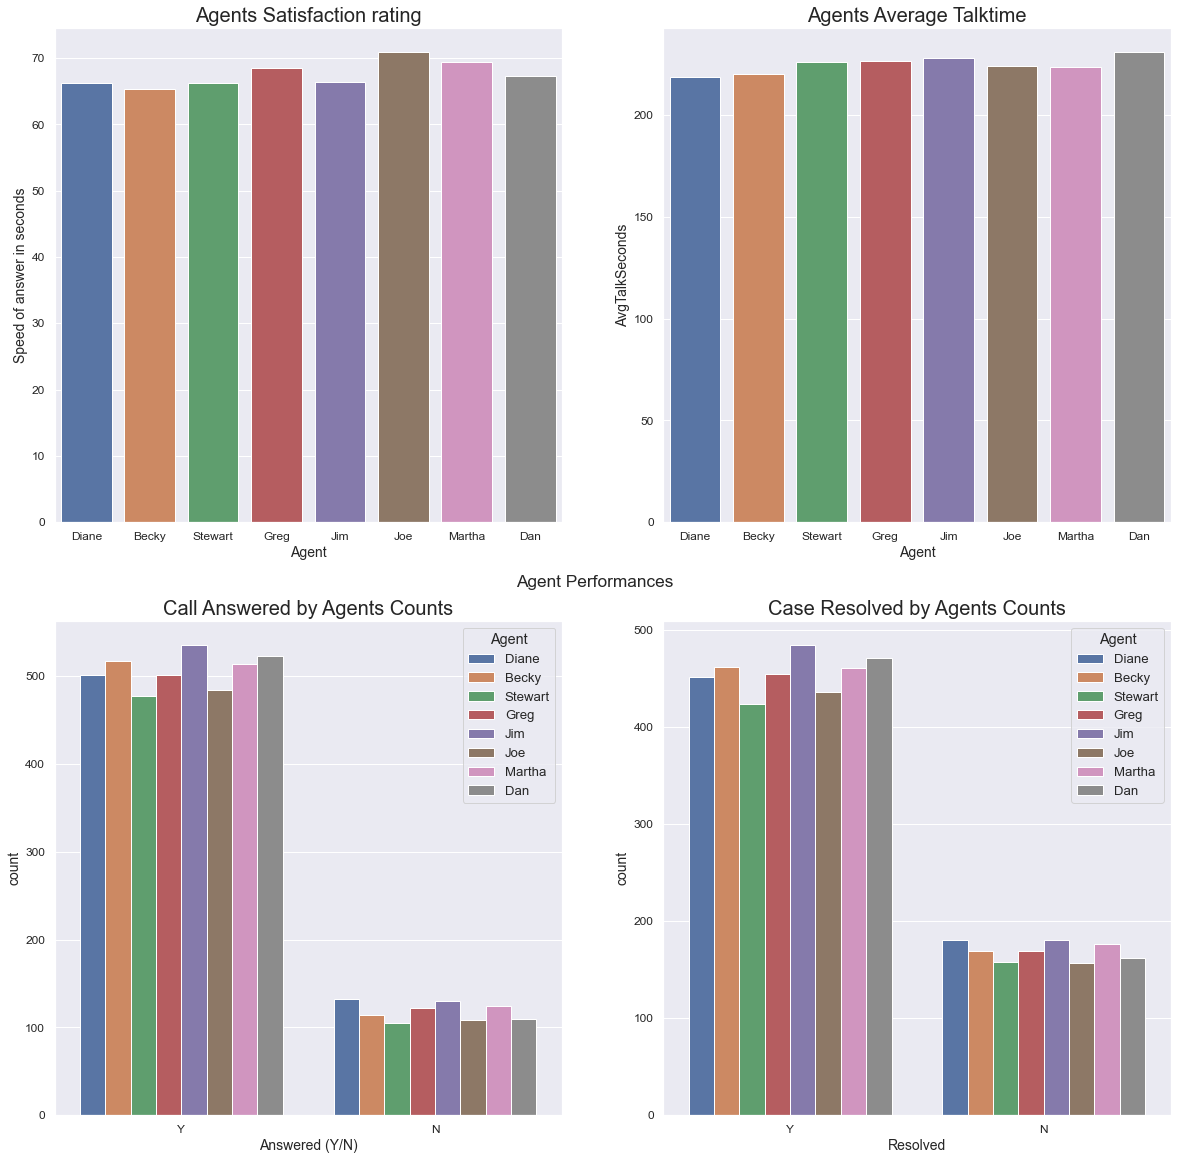

In [26]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=False, figsize=(20,20))
fig.suptitle('Agent Performances', y=0.5)

sns.barplot(x="Agent", y="Speed of answer in seconds", data=df, ax=ax1, ci=None)
ax1.set_title('Agents Satisfaction rating', size=20)
#ax1.tick_params('x', labelrotation=45)


sns.barplot(x="Agent", y="AvgTalkSeconds", data=df, ax=ax2, ci=None)
ax2.set_title('Agents Average Talktime', size=20)
#ax2.tick_params('x', labelrotation=45)

sns.countplot(x="Answered (Y/N)", hue=df.Agent, data=df, ax=ax3)
ax3.set_title('Call Answered by Agents Counts', size=20)
#ax3.tick_params('x', labelrotation=45)


sns.countplot(x="Resolved", hue=df.Agent, data=df, ax=ax4)
ax4.set_title('Case Resolved by Agents Counts', size=20)
#ax4.tick_params('x', labelrotation=45)


plt.show()

In [ ]:
plt.figure(figsize=(20,20))


g = sns.catplot(x='gender', hue = 'tenure', row = 'division',
            kind='count', data=ratings_df,
            height = 3, aspect = 1)

g.set_xlabels("")
g.set_ylabels("")
#g = (g.set_axis_labels("Tip","Total bill(USD)").set(xlim=(0,10),ylim=(0,100)


g.set(xlim=(0,None))
g.set_xticklabels(rotation=90)

plt.suptitle('', x=0.5, y=1.02, ha='center', fontsize=20)

plt.show()

In [ ]:
plt.figure(figsize=(20,20))

sns.catplot(x="calories", y="restaurant",

                hue="is_salad", ci=None,

                data=df_calories, color=None, linewidth=3, showfliers = False,

                orient="h", height=20, aspect=1, palette=None,

                kind="box", dodge=True)

plt.xlabel("", size=20)
plt.ylabel("", size=20)
plt.suptitle('', x=0.5, y=1.02, ha='center', fontsize=20)
plt.show()

In [ ]:
plt.figure(figsize=(20,20))

sns.relplot(x="age", y="eval", hue="gender",
            row="tenure",
            data=ratings_df, height = 3, aspect = 2)

plt.xlabel("", size=20)
plt.ylabel("", size=20)
plt.suptitle('', x=0.5, y=1.02, ha='center', fontsize=20)
plt.show()

### Time-Series Analysis

In [27]:
df.columns

Index(['Call Id', 'Agent', 'Date', 'Time', 'Topic', 'Answered (Y/N)', 'Resolved', 'Speed of answer in seconds', 'AvgTalkDuration', 'Satisfaction rating', 'AvgTalkSeconds', 'Hour'], dtype='object')

In [28]:
timeseries = df[['Date','Speed of answer in seconds','AvgTalkSeconds', 'Hour']]

In [29]:
timeseries.head()

,Date,Speed of answer in seconds,AvgTalkSeconds,Hour
0,2021-01-01,109.00,143.00,9
1,2021-01-01,70.00,242.00,9
2,2021-01-01,10.00,131.00,9
3,2021-01-01,53.00,37.00,9
4,2021-01-01,95.00,60.00,10


In [30]:
timeseries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        5000 non-null   datetime64[ns]
 1   Speed of answer in seconds  4054 non-null   float64       
 2   AvgTalkSeconds              4054 non-null   float64       
 3   Hour                        5000 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 156.4 KB


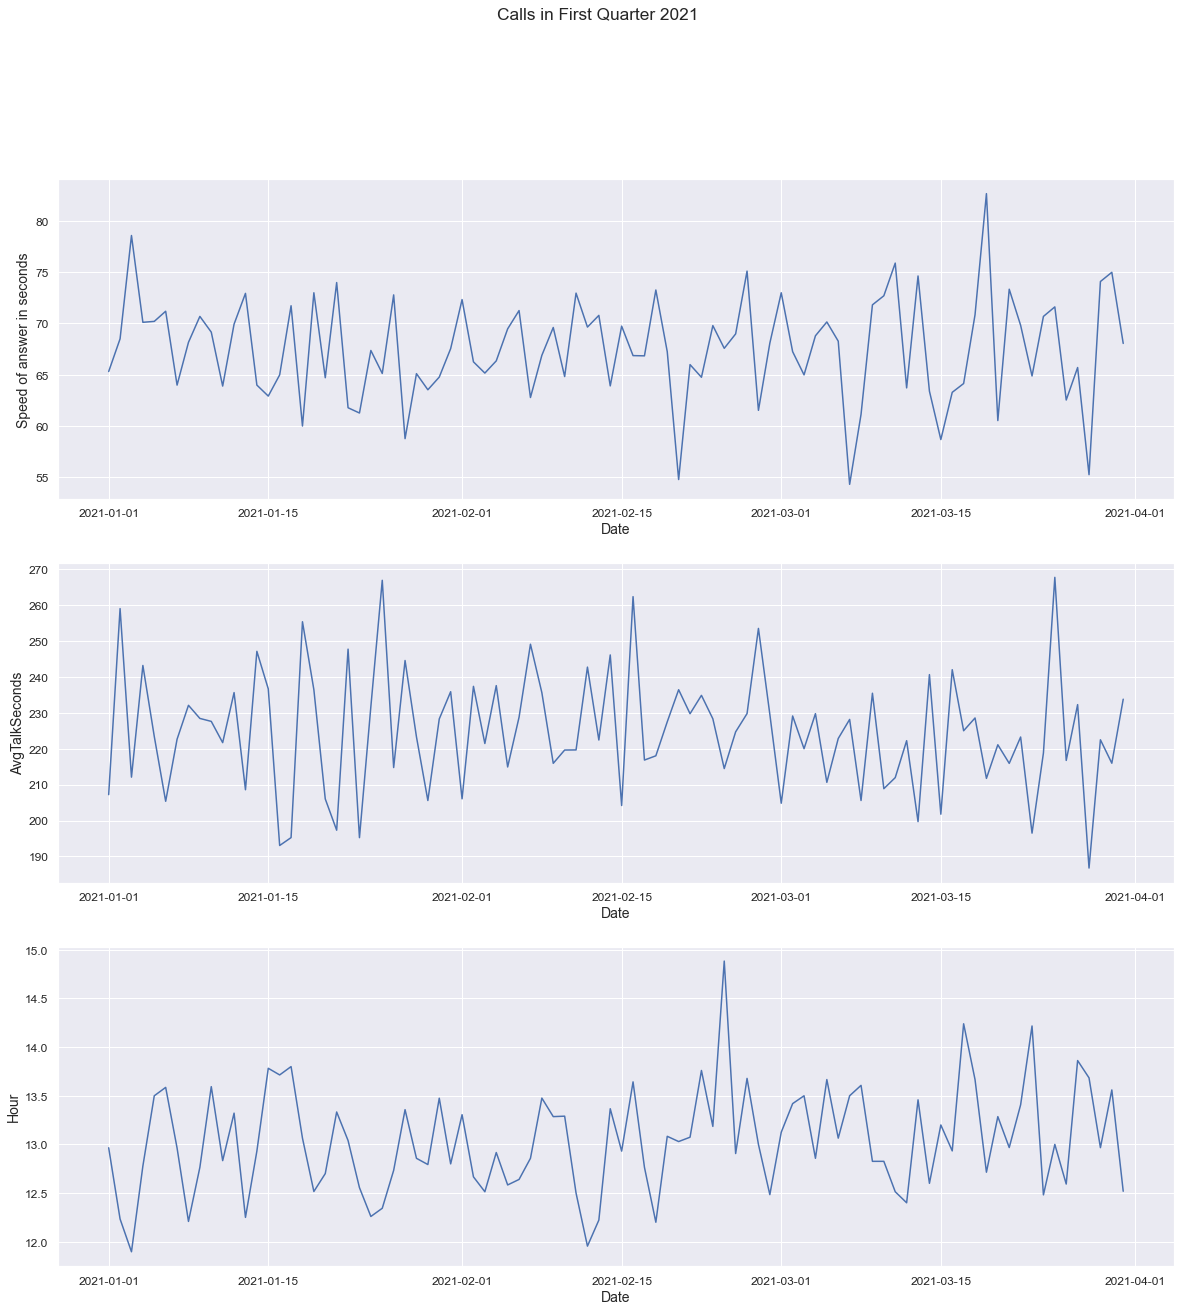

In [31]:
fig, ax = plt.subplots(3, sharex=False, figsize=(20,20))
fig.suptitle('Calls in First Quarter 2021', y=1)

sns.lineplot(x="Date", y="Speed of answer in seconds", data=df, ax=ax[0], ci=None)
ax1.set_title('Answering speed by Date', size=20)
#ax1.tick_params('x', labelrotation=45)


sns.lineplot(x="Date", y="AvgTalkSeconds", data=df, ax=ax[1], ci=None)
ax2.set_title('Average Talktime by Date', size=20)
#ax2.tick_params('x', labelrotation=45)

sns.lineplot(x="Date", y="Hour", data=df, ax=ax[2], ci=None)
ax3.set_title('Hourly Demand by Date', size=20)
#ax3.tick_params('x', labelrotation=45)


plt.show()

In [ ]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.date,y=df.amount,data=df, estimator=None)
plt.title("", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.legend(['',''])
plt.show()

In [ ]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.month,y=df.amount,data=df, estimator=None)
plt.title("", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.legend(['',''])
plt.show()

In [ ]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.month,y=df.amount,data=df, estimator=None)
plt.title("", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.legend(['',''])
plt.show()

### Pairplots

<Figure size 1440x1440 with 0 Axes>

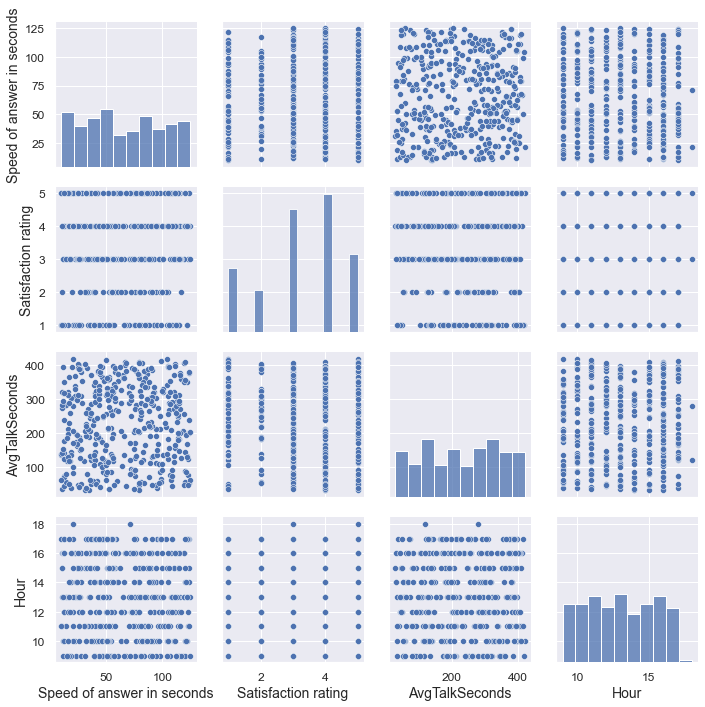

In [32]:
plt.figure(figsize=(20,20))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize=20)
sns.pairplot(df.sample(500))
plt.show()

### Bivariate Data Exploration

In [ ]:
sns.jointplot(x='', y='',data=df, kind='scatter')

sns.jointplot(x='', y='',data=df, kind='scatter')

sns.jointplot(x='', y='',data=df, kind='scatter')

sns.jointplot(x='', y='',data=df, kind='scatter')

sns.jointplot(x='', y='',data=df, kind='kde')

sns.jointplot(x='', y='',data=df, kind='kde')

sns.jointplot(x='', y='',data=df, kind='hex')

sns.jointplot(x='', y='',data=df, kind='hex')

sns.jointplot(x='', y='',data=df, kind='reg',scatter_kws={'color':'k'},line_kws={'color':'red'})

sns.jointplot(x='', y='',data=df, kind='reg',scatter_kws={'color':'k'},line_kws={'color':'red'})

sns.lmplot(x='num_items', y='total_value', data=df, scatter_kws={'s': 1, 'alpha': 0.1}, height=5, aspect=1,
           line_kws={'lw': 2, 'color': 'red'})

sns.lmplot(x='num_items', y='total_value', data=df, scatter_kws={'s': 1, 'alpha': 0.1}, height=5, aspect=1,
           line_kws={'lw': 2, 'color': 'red'})

plt.tight_layout()
plt.show()

### Regression plot

In [ ]:
line_color = {'color': 'red'}
fig , ax = plt.subplots(2,2, figsize=(20,20))

#Feature

ax1 = sns.regplot(x=X_test.bmi, y=lr_pred, line_kws=line_color, ax=ax[0,0])
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.title.set_text("Plot 1", size=15)

#Feature

ax2 = sns.regplot(x=X_test.s5, y=lr_pred, line_kws=line_color, ax=ax[0,1])
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.title.set_text("Plot 2", size=15)

#Feature

ax3 = sns.regplot(x=X_test.bp, y=lr_pred, line_kws=line_color, ax=ax[1,0])
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.title.set_text("Plot 3", size=15)

#Feature

ax4 = sns.regplot(x=X_test.s4, y=lr_pred, line_kws=line_color, ax=ax[1,1])
ax4.set_xlabel("x")
ax4.set_ylabel("y")
ax1.title.set_text("Plot 4", size=15)

plt.show()

### FacetGrid

In [ ]:
g = sns.FacetGrid(data=df, col="column_name", height=3, aspect=1)
g.map(plt.scatter, "numeric", "numeric")
g.add_legend()
plt.show()

### Correlation

In [33]:
df.corr()

,Speed of answer in seconds,Satisfaction rating,AvgTalkSeconds,Hour
Speed of answer in seconds,1.00,0.00,-0.00,-0.01
Satisfaction rating,0.00,1.00,0.00,-0.03
AvgTalkSeconds,-0.00,0.00,1.00,0.01
Hour,-0.01,-0.03,0.01,1.00


In [ ]:
df.corr()["target"].sort_values()

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("", fontsize=20)
plt.show()

#### Python code done by Dennis Lam